# Wine Dataset Analysis - Unsupervised Learning Study

## Project Overview

**Objective:** To explore patterns and relationships in wine chemical composition data using unsupervised learning techniques, with the goal of understanding natural groupings and identifying key distinguishing chemical features.

## Dataset Information

- **Source:** Wine Data Set from UCI ML Repository (https://archive.ics.uci.edu/ml/datasets/wine)
- **Samples:** 178 wine samples from 3 different cultivars grown in the same region of Italy  
- **Features:** 13 chemical constituent measurements per sample
- **Type:** Multivariate dataset suitable for classification and clustering analysis

In [116]:
# Import basic libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# Load the wine dataset
wine_data = pd.read_csv('wine-clustering.csv')

## **Exploratory Data Analysis (EDA)**

In [118]:
# Display a random sample of 10 rows from the dataset
wine_data.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
141,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780
99,12.29,3.17,2.21,18.0,88,2.85,2.99,0.45,2.81,2.30,1.42,2.83,406
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
79,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463
52,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190
57,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270
65,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678
35,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
38,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020


In [119]:
wine_data.shape

(178, 13)

In [120]:
wine_data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [121]:
wine_data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [122]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Outliers**

In [123]:
# Import the necessary libraries from plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Get the list of columns
features = wine_data.columns

# Create a figure with subplots
# We define a 4x4 grid and pass the column names as titles for each subplot
fig = make_subplots(rows=4, cols=4, subplot_titles=features)

# Loop through each feature and add a boxplot to the corresponding subplot
for i, feature in enumerate(features):
    # Calculate the row and column position for the current subplot
    row = (i // 4) + 1
    col = (i % 4) + 1
    
    # Add the boxplot trace to the figure at the calculated position
    fig.add_trace(
        go.Box(y=wine_data[feature], name=feature),
        row=row,
        col=col
    )

# Update the layout for a better look
fig.update_layout(
    height=1500, 
    width=1300, 
    title_text="Distribution of Wine Features (Hover for Values)",
    showlegend=False  # We don't need a legend since each plot has a title
)

# Show the interactive figure
fig.show()

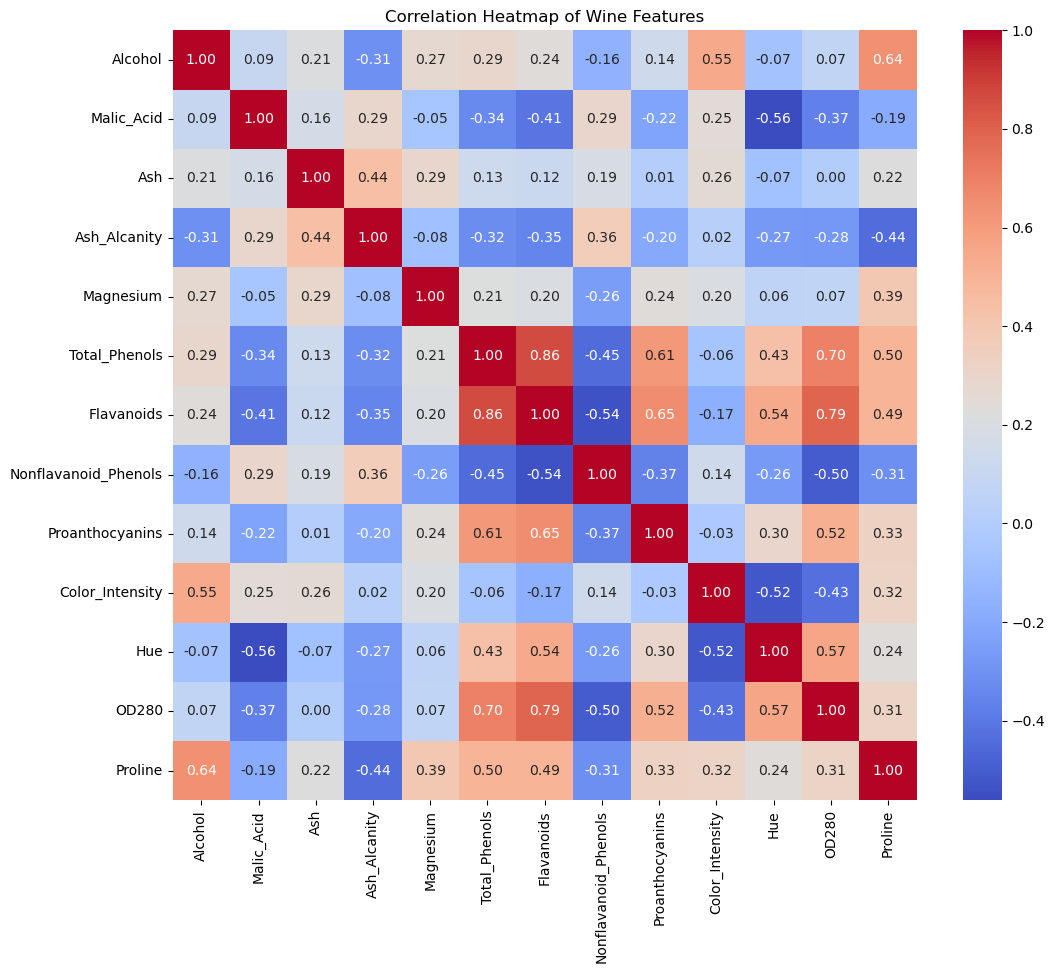

In [159]:
plt.figure(figsize=(12, 10))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Wine Features')
plt.show()

## **Data Preprocessing: Feature Scaling**

In [124]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the data
wine_data_scaled = scaler.fit_transform(wine_data)

In [125]:
wine_data_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## **Dimensionality Reduction (PCA)**

In [126]:
from sklearn.decomposition import PCA

# Create a PCA object to reduce to 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled data
wine_pca = pca.fit_transform(wine_data_scaled)
wine_pca

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

In [128]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [129]:
pca.explained_variance_ratio_.sum()

np.float64(0.5540633835693528)

## **Modeling: K-Means Clustering with PCA**

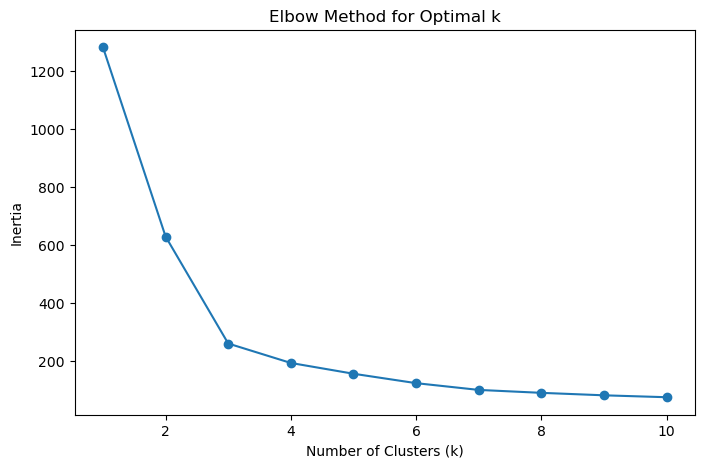

In [ ]:
from sklearn.cluster import KMeans

# Find the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(wine_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

**Aplly K-Means Clustering**

In [130]:
# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(wine_pca)

In [131]:
kmeans2 = kmeans.fit(wine_pca)

In [132]:
# Center the clusters
centers = kmeans.cluster_centers_
centers

array([[ 2.26614991,  0.86559213],
       [-2.74392982,  1.2141906 ],
       [-0.16278513, -1.76758824]])

In [134]:
# Data classification
classification = kmeans2.labels_
classification

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [135]:
import plotly.express as px
import plotly.graph_objects as go

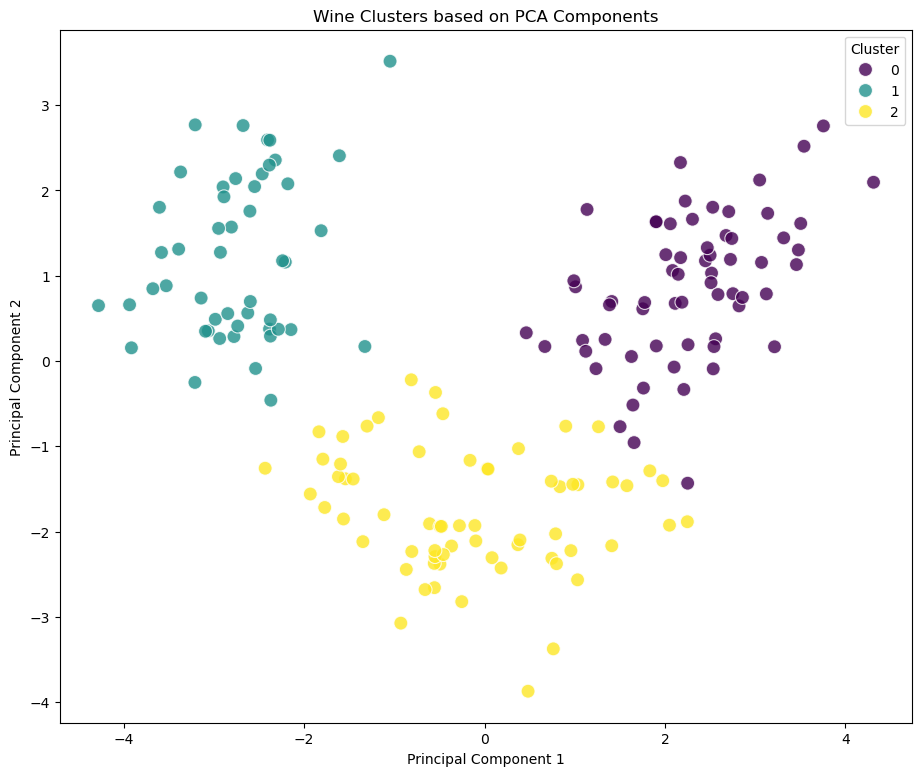

In [143]:
# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=wine_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster_labels

# Plot the clusters using seaborn
plt.figure(figsize=(11, 9))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.8)
plt.title('Wine Clusters based on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [148]:
# Create a copy of the original dataframe to avoid modifying it
wine_data_clustered = wine_data.copy()

# Add the cluster labels as a new column
wine_data_clustered['Cluster'] = cluster_labels

# Display 10 random rows to see the new column
wine_data_clustered.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,1
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,0
112,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607,2
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564,2
107,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488,2
26,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195,0
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985,0
94,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345,2
53,13.77,1.90,2.68,17.1,115,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375,0
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530,1


In [155]:
# Show how many samples are in each cluster
wine_data_clustered['Cluster'].value_counts().sort_index()

Cluster
0    64
1    49
2    65
Name: count, dtype: int64

In [151]:
# Calculate the mean of each feature for each cluster
cluster_summary = wine_data_clustered.groupby('Cluster').mean()
print(cluster_summary)

           Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Cluster                                                              
0        13.659219    1.975781  2.463750     17.596875  107.312500   
1        13.151633    3.344490  2.434694     21.438776   99.020408   
2        12.238308    1.931385  2.219385     19.898462   92.830769   

         Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Cluster                                                                     
0             2.859688    3.012656              0.290000         1.921719   
1             1.678163    0.797959              0.450816         1.163061   
2             2.204308    1.989231              0.365538         1.587692   

         Color_Intensity       Hue     OD280      Proline  
Cluster                                                    
0               5.406250  1.069688  3.157188  1082.562500  
1               7.343265  0.685918  1.690204   627.551020  
2               2.99261